# Curso IA UBA

Creado por [Pablo Casas](https://twitter.com/pabloc_ds)


--- 

## Embeddings en Keras 


Objetivo: 





### 1) Montando el drive en google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/_Escuela Datos Vivos/Deep Learning 360/DL360 N2')

### 2) Carga de datos y librerías

In [ ]:
!pip install funpymodeling

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from funpymodeling.exploratory import status, freq_tbl, profiling_num
from funpymodeling.data_prep import todf


In [ ]:

data=pd.read_csv('data/encuesta_sysarmy_arg_2019_1.csv')

In [ ]:
data.shape

(4482, 47)

In [ ]:
pd.set_option('max_rows', 100)
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Me identifico,0,0.000000,0,0.000000,3,object
1,Tengo,0,0.000000,0,0.000000,58,int64
2,Dónde estás trabajando,0,0.000000,0,0.000000,25,object
3,Años de experiencia,0,0.000000,235,0.052432,52,float64
4,Años en la empresa actual,0,0.000000,1038,0.231593,48,float64
5,Años en el puesto actual,0,0.000000,921,0.205489,39,float64
6,¿Gente a cargo?,0,0.000000,3335,0.744087,47,int64
7,Nivel de estudios alcanzado,0,0.000000,0,0.000000,7,object
8,Estado,0,0.000000,0,0.000000,3,object
9,Carrera,554,0.123606,0,0.000000,1485,object


In [ ]:
data.head()

,Me identifico,Tengo,Dónde estás trabajando,Años de experiencia,Años en la empresa actual,Años en el puesto actual,¿Gente a cargo?,Nivel de estudios alcanzado,Estado,Carrera,Universidad,Realizaste cursos de especialización,¿Contribuís a proyectos open source?,¿Programás como hobbie?,Trabajo de,Plataformas,Lenguajes de programación,"Frameworks, herramientas y librerías",Bases de datos,QA / Testing,IDEs,¿Qué SO usás en tu laptop/PC para trabajar?,¿Y en tu celular?,¿Tenés guardias?,Cuánto cobrás por guardia,"¿Porcentaje, bruto o neto?",Tipo de contrato,Salario mensual BRUTO (en tu moneda local),Salario mensual NETO (en tu moneda local),¿Qué tan conforme estás con tu sueldo?,Cómo creés que está tu sueldo con respecto al último semestre,Recibís algún tipo de bono,A qué está atado el bono,¿Tuviste ajustes por inflación en 2018?,¿De qué % fue el ajuste?,¿En qué mes fue el último ajuste?,¿Sufriste o presenciaste situaciones de violencia laboral?,Orientación sexual,¿Tenés algún tipo de discapacidad?,¿Sentís que esto te dificultó el conseguir trabajo?,¿A qué eventos de tecnología asististe en el último año?,Cantidad de empleados,Actividad principal,¿La recomendás como un buen lugar para trabajar?,¿Cómo calificás las políticas de diversidad e inclusión?,¿A cuántos kilómetros de tu casa queda la oficina?,Beneficios extra
0,Hombre,22,Catamarca,2.0,1.0,1.0,0,Universitario,En curso,ING informática,Unca,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,Linux,"HTML, Javascript, PHP, Python","Django, Toba Framework","MySQL, PostgreSQL",Selenium,Atom,Linux,Android,No,0.0,Bruto,Full-Time,35000.0,33000.0,2,3,Menos de un sueldo,Mix de las anteriores,Dos,25.0,5,Jamás,Heterosexual,NaN,NaN,NaN,1001-2000,Producto basado en Software,8,9,2.0,Capacitaciones y/o cursos
1,Hombre,23,Catamarca,2.0,1.0,1.0,0,Secundario,Completado,Ing informática,UNCa,"Sí, de forma particular",No,Sí,"Developer, SysAdmin y Redes","Linux, VMWare, Proxmox, Mikrotik, Cisco","Bash/Shell, CSS, HTML, Javascript, PHP, Python...","Cordova, Django, Node.js, React.js, WordPress,...","Informix, MariaDB, MongoDB, MySQL, PostgreSQL",Selenium,"Atom, Nano",Linux,Android,No,0.0,Porcentaje de mi sueldo,Part-Time,25000.0,22000.0,2,1,Un sueldo,Mix de las anteriores,Uno,22.0,12,Jamás,Heterosexual,NaN,NaN,Charlas online,51-100,Producto basado en Software,8,10,2.0,"Capacitaciones y/o cursos, Licencia de paterni..."
2,Mujer,35,Chaco,8.0,7.0,2.0,2,Posgrado,En curso,MTI,Universidad del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,Developer,NaN,".NET, R",".NET Core, shiny, entre otras librerías de R",MSSQL,NaN,"RStudio, Sublime Text, Visual Studio",Windows,Android,"Sí, pasiva",0.0,Neto,Full-Time,50000.0,45000.0,2,2,De uno a tres sueldos,Performance de la compañía,Dos,4.0,10,En mi trabajo actual,dgsdg,NaN,No,varios,201-500,Otras industrias,4,4,0.2,"Capacitaciones y/o cursos, Licencia de paterni..."
3,Hombre,41,Chaco,20.0,2.0,10.0,0,Universitario,Completado,Lic en sistemas,Uba / CAECE,"Sí, los pagó un empleador",No,No,Developer,NaN,".NET, C#, CSS, HTML, Javascript, TypeScript",Angular,MySQL,NaN,"Visual Studio, Vs code",Mac OS X,Android,No,0.0,Bruto,Freelance,70000.0,65000.0,3,2,No,No recibo bono,Más de dos,40.0,10,Jamás,Heterosexual,NaN,NaN,Ninguno,1-10,Servicios / Consultoría de Software / Digital,5,1,-1.0,"Horarios flexibles, Vacaciones flexibles (adic..."
4,Hombre,35,Chaco,5.0,3.0,2.0,0,Universitario,Completado,Analisis en Sistemas,UTN,"Sí, los pagó un empleador",No,No,Product Manager,"Google Cloud Platform/App Engine, Linux",NaN,NaN,MySQL,NaN,NaN,Linux,Android,No,0.0,Neto,Full-Time,35000.0,28780.0,2,2,No,No recibo bono,Uno,10.0,10,En mi trabajo actual,Heterosexual,NaN,No,NaN,501-1000,Producto basado en Software,8,8,1.0,"Capacitaciones y/o cursos, Clases de idiomas, ..."


In [ ]:
#d_insp.score.hist()

̇¿Cómo usar `funpymodeling`? 
https://www.youtube.com/watch?v=1wwQ9mWxrVE

### 3) Preparación de datos



In [ ]:
input='Trabajo de'
target='Salario mensual BRUTO (en tu moneda local)'
data_x=data[[input]]

# Output:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#data[[target]]
data_y=scaler.fit_transform(data[[target]])
#data_y=data[[target]]

In [ ]:
profiling_num(data[[target]])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Salario mensual BRUTO (en tu moneda local),66708.338151,387420.626264,5.807679,31.8898,14500.0,32508.25,49000.0,70000.0,137000.0,250000.0


In [ ]:
profiling_num(data_y)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,0,1.117159e-17,1.000112,8.952277e+16,-0.172123,-0.134774,-0.088286,-0.045713,0.008497,0.181455,0.47316


In [ ]:
#data_y=np.where(data[[target]] > 137000, 137000, data[[target]] )
data_y=np.where(data_y >0.47316, 0.47316, data_y)

In [ ]:
from sklearn.model_selection import train_test_split

x_train_base, x_test_base, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4ddf4f4e0>]],
      dtype=object)

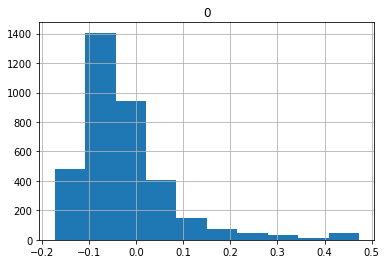

In [ ]:
todf(y_train).hist()

### x) Enfoque 1: Hacer one hot encoding

In [ ]:
x_train1=pd.get_dummies(x_train_base)

x_test1=pd.get_dummies(x_test_base).reindex(columns = x_train1.columns).fillna(0)

In [ ]:
x_train_base

,Trabajo de
4423,telecobrador
3266,SysAdmin / DevOps / SRE
127,SysAdmin / DevOps / SRE
4276,HelpDesk
3185,SysAdmin / DevOps / SRE
...,...
237,Developer
1387,HelpDesk
4352,HelpDesk
3831,IT Soporte + SysAdmin


In [ ]:
x_train1.shape

(3585, 355)

In [ ]:
# Carga de libs

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
_,in_shape=x_train1.shape
in_shape

355

In [ ]:
model1 = Sequential()

model1.add(Dense(128, input_dim=in_shape)) # input_dim son las variables de entrada
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='linear'))  # linear: sale lo que entra

#### Compilación del modelo:

In [ ]:
model1.compile(optimizer='adam',
              loss='MSE',
              metrics='MAE')

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               45568     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 53,889
Trainable params: 53,889
Non-trainable params: 0
_________________________________________________________________


### x) Fit del modelo! (entrenamiento)

In [ ]:
history1 = model1.fit(x_train1, y_train, epochs=40, batch_size=4096, validation_split=0.2)

Epoch 1/40
1/1 [==============================] - 0s 196ms/step - loss: 0.0167 - MAE: 0.1053 - val_loss: 0.0121 - val_MAE: 0.0812
Epoch 2/40
1/1 [==============================] - 0s 20ms/step - loss: 0.0122 - MAE: 0.0811 - val_loss: 0.0114 - val_MAE: 0.0714
Epoch 3/40
1/1 [==============================] - 0s 19ms/step - loss: 0.0111 - MAE: 0.0702 - val_loss: 0.0116 - val_MAE: 0.0705
Epoch 4/40
1/1 [==============================] - 0s 19ms/step - loss: 0.0111 - MAE: 0.0679 - val_loss: 0.0114 - val_MAE: 0.0690
Epoch 5/40
1/1 [==============================] - 0s 30ms/step - loss: 0.0106 - MAE: 0.0657 - val_loss: 0.0107 - val_MAE: 0.0667
Epoch 6/40
1/1 [==============================] - 0s 22ms/step - loss: 0.0098 - MAE: 0.0631 - val_loss: 0.0101 - val_MAE: 0.0659
Epoch 7/40
1/1 [==============================] - 0s 19ms/step - loss: 0.0092 - MAE: 0.0620 - val_loss: 0.0099 - val_MAE: 0.0676
Epoch 8/40
1/1 [==============================] - 0s 19ms/step - loss: 0.0090 - MAE: 0.0634 - va

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_all(history, metric):
  fig1 = go.Figure()
  fig1.add_trace(go.Scattergl(y=history.history[metric], name='Train'))
  fig1.add_trace(go.Scattergl(y=history.history['val_'+metric], name='Valid'))
  fig1.update_layout(height=300, width=400,xaxis_title='Epoch', yaxis_title=metric)

  fig2 = go.Figure()
  fig2.add_trace(go.Scattergl(y=history.history['loss'], name='Train'))
  fig2.add_trace(go.Scattergl(y=history.history['val_loss'], name='Valid'))
  fig2.update_layout(height=300, width=400,xaxis_title='Epoch', yaxis_title='Loss')

  return [fig1,fig2]

In [ ]:
fig1,fig2=plot_all(history1, 'MAE')
fig1.show()
fig2.show()

## ¿Podemos hacerlo mejor?

Creo que si.

In [ ]:
# Antes:
#x_train1=pd.get_dummies(d_insp2)
x_train1.shape

(3585, 355)

In [ ]:
data_x[input]

In [ ]:
# Ahora
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit_transform(data_x[input]) # ¿esta bien esto?

array([129, 130, 129, ..., 347, 265, 221])

In [ ]:
x_train2=le.transform(x_train_base[input]) 
x_test2=le.transform(x_test_base[input])

In [ ]:
x_train2.shape

(3585,)

In [ ]:
x_train2

array([129, 221, 181, ..., 375, 280, 129])

In [ ]:
in_dim=x_train2.max()+1
in_dim

443

In [ ]:
from keras.layers import Embedding, Flatten, Dropout

In [ ]:
model2 = Sequential()

model2.add(Embedding(input_dim=in_dim, output_dim=4, input_length=1))
model2.add(Flatten())
#model2.add(Dense(4, activation='relu'))
model2.add(Dense(1))  # linear: sale lo que entra

In [ ]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 1, 4)              1772      
_________________________________________________________________
flatten_6 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total params: 1,777
Trainable params: 1,777
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer=keras.optimizers.Adam(lr=0.1),  # default lr=0.01 
              loss='MSE',
              metrics='MAE')

In [ ]:
history2 = model2.fit(x_train2, y_train, epochs=40, batch_size=2048, validation_split=0.2)

Epoch 1/40
2/2 [==============================] - 0s 56ms/step - loss: 0.0152 - MAE: 0.0895 - val_loss: 0.0120 - val_MAE: 0.0814
Epoch 2/40
2/2 [==============================] - 0s 10ms/step - loss: 0.0118 - MAE: 0.0824 - val_loss: 0.0111 - val_MAE: 0.0790
Epoch 3/40
2/2 [==============================] - 0s 9ms/step - loss: 0.0107 - MAE: 0.0745 - val_loss: 0.0123 - val_MAE: 0.0745
Epoch 4/40
2/2 [==============================] - 0s 11ms/step - loss: 0.0119 - MAE: 0.0743 - val_loss: 0.0117 - val_MAE: 0.0750
Epoch 5/40
2/2 [==============================] - 0s 10ms/step - loss: 0.0105 - MAE: 0.0710 - val_loss: 0.0098 - val_MAE: 0.0685
Epoch 6/40
2/2 [==============================] - 0s 10ms/step - loss: 0.0093 - MAE: 0.0650 - val_loss: 0.0103 - val_MAE: 0.0726
Epoch 7/40
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - MAE: 0.0665 - val_loss: 0.0099 - val_MAE: 0.0715
Epoch 8/40
2/2 [==============================] - 0s 9ms/step - loss: 0.0091 - MAE: 0.0667 - val_l

In [ ]:
fig1,fig2=plot_all(history2, 'MAE')
fig1.show()
fig2.show()

## Chequeo de sanidad / Validación

In [ ]:
y_pred_test1 = model1.predict(x_test1).flatten()
y_pred_test2 = model2.predict(x_test2).flatten()

In [ ]:
y_test[:,0].shape
y_pred_test1.shape

(897,)

In [ ]:
pd_res=pd.DataFrame({'y_test':y_test[:,0], 'pred1':y_pred_test1, 'pred2':y_pred_test2})
pd_res

,y_test,pred1,pred2
0,-0.110250,-0.055716,-0.055375
1,-0.087017,-0.090484,-0.096755
2,-0.023771,-0.090484,-0.096755
3,-0.077982,-0.019787,-0.017114
4,0.240829,-0.019787,-0.017114
...,...,...,...
892,-0.037969,-0.029207,-0.029189
893,-0.041841,-0.019787,-0.017114
894,-0.090889,-0.011454,-0.009840
895,-0.048295,-0.065645,-0.058123


In [ ]:
print(abs(y_test - y_test.mean()).mean())

print(abs(y_test - y_pred_test1).mean())

print(abs(y_test - y_pred_test2).mean())

0.07557984900321198
0.0816891112109701
0.0828860737165664


In [ ]:
print(y_pred_test1.shape)
print(y_pred_test2.shape)

(897,)
(897,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4de939f98>]],
      dtype=object)

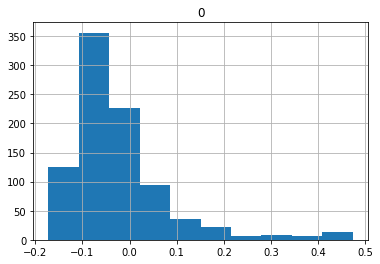

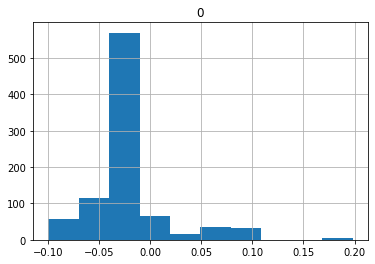

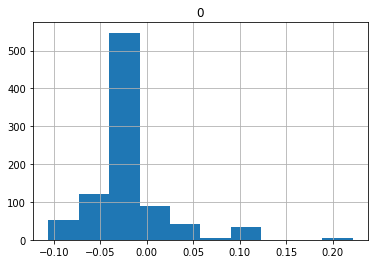

In [ ]:
todf(y_test).hist()
todf(y_pred_test1).hist()
todf(y_pred_test2).hist()

In [ ]:
profiling_num(todf(y_pred_test1))
profiling_num(y_pred_test2)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99


In [ ]:
todf(y_pred_test2).describe()

,0
count,8.970000e+02
mean,-2.374022e-02
std,4.286474e-08
min,-2.374018e-02
25%,-2.374018e-02
50%,-2.374018e-02
75%,-2.374018e-02
max,-2.374018e-02


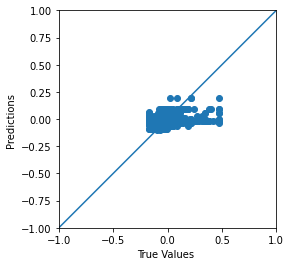

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_test1)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [-1, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


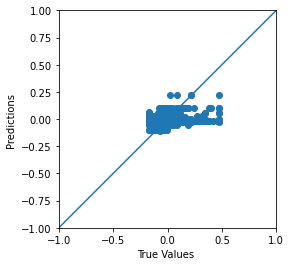

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_test2)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [-1, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
